# 7장. 케라스2로 구현하는 GAN(생성적 경쟁 신경망)
## 7.2 확률분포 생성을 위한 완전 연결 계층 GAN 구현
필기체 숫자 즉 MNIST를 이용해 AE을 구현

In [1]:
# set to use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### 7.2.1 패키지 임포트 
1. 확률분포 생성 GAN을 구현하는 데 필요한 패키지 임포트

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.layers import Dense, Conv1D, Reshape, Flatten, Lambda

from keras.optimizers import Adam
from keras import backend as K

### 7.2.5 코드 수행과 결과 보기
- GAN을 동작시키는 머신의 인스턴스를 만듬

In [3]:
def main():
    machine = Machine(n_batch=1, ni_D=100)
    machine.run(n_repeat=200, n_show=200, n_test=100)

### 7.2.1 데이터 생성 클래스
- GAN에 적용할 데이터 관리 클래스

In [4]:
class Data:
    def __init__(self, mu, sigma, ni_D):
        self.real_sample = lambda n_batch: np.random.normal(mu, sigma, (n_batch, ni_D))
        self.in_sample = lambda n_batch: np.random.rand(n_batch, ni_D)

### 7.2.4 머신 구현하기
4. 머신은 데이터와 모델로 GAN을 학습하고 성능을 평가하는 인공신경망 전체를 총괄하는 객체

In [ ]:
class Machine:
    def __init__(self, n_batch=10, ni_D=100):
        data_mean = 4
        data_stddev = 1.25

        self.n_iter_D = 1
        self.n_iter_G = 5

        self.data = Data(data_mean, data_stddev, ni_D)
        self.gan = GAN(ni_D=ni_D, nh_D=50, nh_G=50)

        self.n_batch = n_batch
        # self.ni_D = ni_D

    def train_D(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data

        # Real data
        Real = data.real_sample(n_batch)  # (n_batch, ni_D)
        # Generated data
        Z = data.in_sample(n_batch)  # (n_batch, ni_D)
        Gen = gan.G.predict(Z)  # (n_batch, ni_D)

        gan.D.trainable = True
        gan.D_train_on_batch(Real, Gen)

    def train_GD(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data
        # Seed data for data generation
        Z = data.in_sample(n_batch)

        gan.D.trainable = False
        gan.GD_train_on_batch(Z)

    def train_each(self):
        for it in range(self.n_iter_D):
            self.train_D()
        for it in range(self.n_iter_G):
            self.train_GD()

    def train(self, epochs):
        for epoch in range(epochs):
            self.train_each()

    def test(self, n_test):
        gan = self.gan
        data = self.data
        Z = data.in_sample(n_test)
        Gen = gan.G.predict(Z)
        return Gen, Z

    def show_hist(self, Real, Gen, Z):
        plt.hist(Real.reshape(-1), histtype='step', label='Real')
        plt.hist(Gen.reshape(-1), histtype='step', label='Generated')
        plt.hist(Z.reshape(-1), histtype='step', label='Input')
        plt.legend(loc=0)

    def test_and_show(self, n_test):
        data = self.data
        Gen, Z = self.test(n_test)
        Real = data.real_sample(n_test)
        self.show_hist(Real, Gen, Z)
        Machine.print_stat(Real, Gen)

    def run_epochs(self, epochs, n_test):
        self.train(epochs)
        self.test_and_show(n_test)

    def run(self, n_repeat=200, n_show=200, n_test=100):
        for ii in range(n_repeat):
            print('Stage', ii, '(Epoch: {})'.format(ii * n_show))
            self.run_epochs(n_show, n_test)
            plt.show()

    @staticmethod
    def print_stat(Real, Gen):
        def stat(d):
            return (np.mean(d), np.std(d))
        print('Mean and Std of Real:', stat(Real))
        print('Mean and Std of Gen:', stat(Gen))

### 7.2.5 GAN 모델링
5. GAN을 모델링

---
### 6.2.6 전체 코드

2021-10-23 08:05:22.291948: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 08:05:22.310538: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-23 08:05:22.310653: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SJKIM-Home): /proc/driver/nvidia/version does not exist
2021-10-23 08:05:22.314012: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-23 08:05:22.358889: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3599995000 Hz
2021-10-23 08:05:22.359833: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56303d9f7470 initialized for platform Host (this does not guarantee that XLA will be used). Devi

Stage 0 (Epoch: 0)
Mean and Std of Real: (4.016199732569621, 1.254863227026408)
Mean and Std of Gen: (0.9642338, 0.5977364)


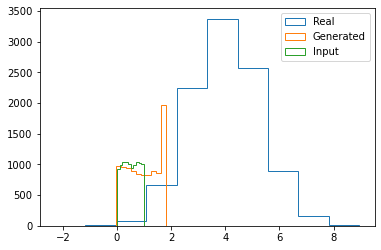

Stage 1 (Epoch: 200)
Mean and Std of Real: (3.9890619315472504, 1.2556632750225047)
Mean and Std of Gen: (3.2070382, 1.1534024)


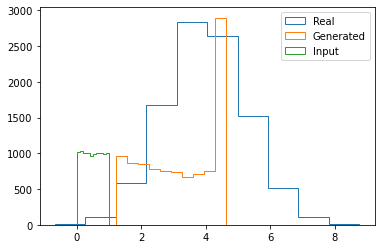

Stage 2 (Epoch: 400)
Mean and Std of Real: (4.018000739817269, 1.2527880210501041)
Mean and Std of Gen: (4.4821177, 1.3703918)


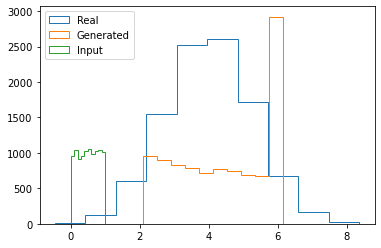

Stage 3 (Epoch: 600)
Mean and Std of Real: (3.9848365072114995, 1.252643675367541)
Mean and Std of Gen: (3.6724153, 1.5163363)


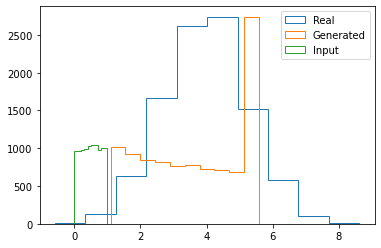

Stage 4 (Epoch: 800)
Mean and Std of Real: (4.001237733960705, 1.2521183607805582)
Mean and Std of Gen: (4.2507358, 1.1699712)


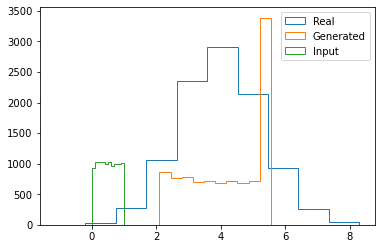

Stage 5 (Epoch: 1000)
Mean and Std of Real: (4.003454494364856, 1.2372041527081934)
Mean and Std of Gen: (3.1267593, 1.285402)


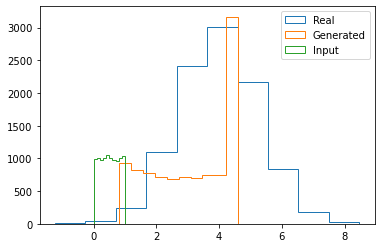

Stage 6 (Epoch: 1200)
Mean and Std of Real: (4.000717964370958, 1.2435797542243805)
Mean and Std of Gen: (3.5414753, 1.0368059)


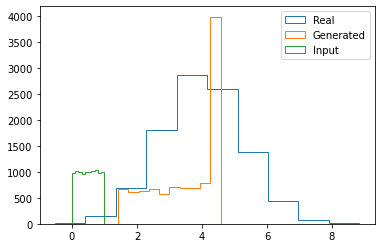

Stage 7 (Epoch: 1400)
Mean and Std of Real: (3.9881780796644635, 1.226778664135737)
Mean and Std of Gen: (3.9748156, 1.1268427)


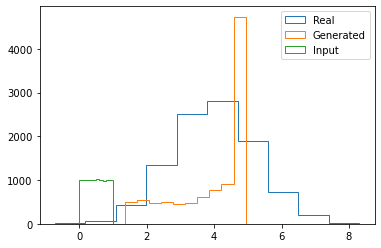

Stage 8 (Epoch: 1600)
Mean and Std of Real: (4.0097898091253725, 1.2512529524563551)
Mean and Std of Gen: (4.7740307, 1.1400583)


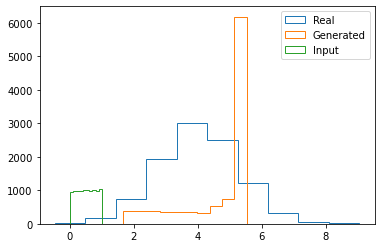

Stage 9 (Epoch: 1800)
Mean and Std of Real: (3.990654160056613, 1.2594390333242684)
Mean and Std of Gen: (5.41337, 1.3833692)


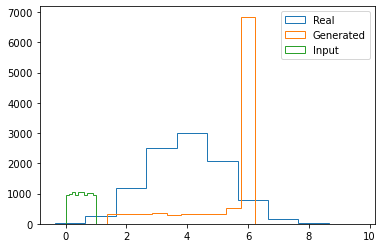

Stage 10 (Epoch: 2000)
Mean and Std of Real: (3.992708176488559, 1.2447653924295075)
Mean and Std of Gen: (5.6556125, 1.5459162)


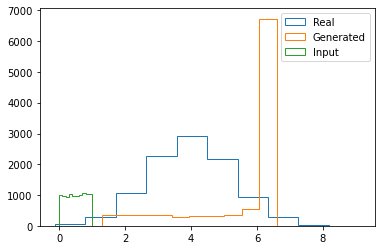

Stage 11 (Epoch: 2200)
Mean and Std of Real: (4.007612905934785, 1.2532712690943943)
Mean and Std of Gen: (5.453724, 1.3862395)


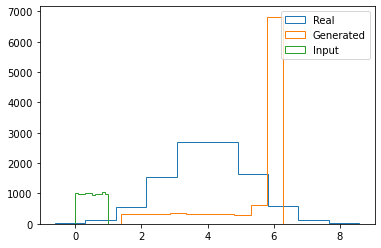

Stage 12 (Epoch: 2400)
Mean and Std of Real: (4.010739269351775, 1.2545903001059406)
Mean and Std of Gen: (5.1671286, 1.3945967)


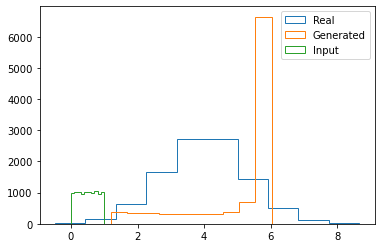

Stage 13 (Epoch: 2600)
Mean and Std of Real: (3.998991562930428, 1.246027956318847)
Mean and Std of Gen: (4.572835, 1.3637838)


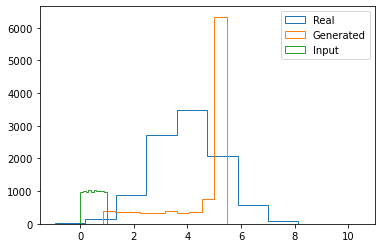

Stage 14 (Epoch: 2800)
Mean and Std of Real: (4.005992580672668, 1.2455603109283122)
Mean and Std of Gen: (4.48214, 1.276743)


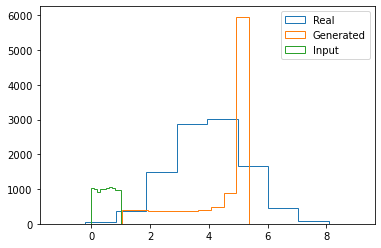

Stage 15 (Epoch: 3000)
Mean and Std of Real: (3.996186615233098, 1.2534199117737823)
Mean and Std of Gen: (4.3738623, 1.3041399)


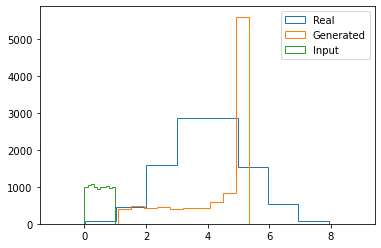

Stage 16 (Epoch: 3200)
Mean and Std of Real: (3.9984432283190587, 1.2638542856767514)
Mean and Std of Gen: (4.1100698, 1.217995)


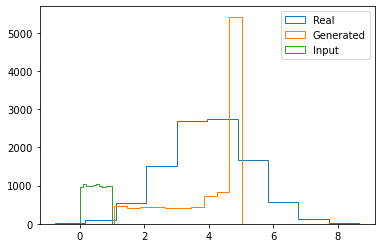

Stage 17 (Epoch: 3400)
Mean and Std of Real: (4.016556907951458, 1.2545293634830876)
Mean and Std of Gen: (3.9800692, 1.288437)


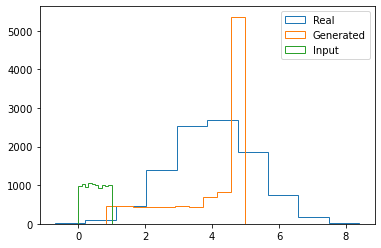

Stage 18 (Epoch: 3600)
Mean and Std of Real: (4.020189773700411, 1.2415331383862558)
Mean and Std of Gen: (4.003745, 1.165879)


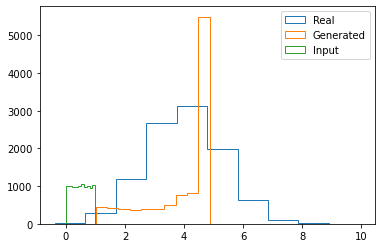

Stage 19 (Epoch: 3800)
Mean and Std of Real: (3.9858623524560013, 1.253506010646175)
Mean and Std of Gen: (4.000622, 1.1438997)


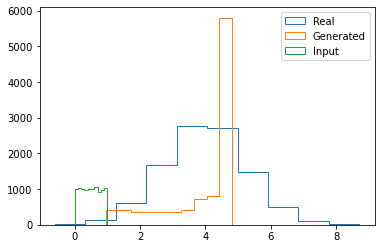

Stage 20 (Epoch: 4000)
Mean and Std of Real: (4.00460870071628, 1.2448686321439908)
Mean and Std of Gen: (4.202256, 1.2766545)


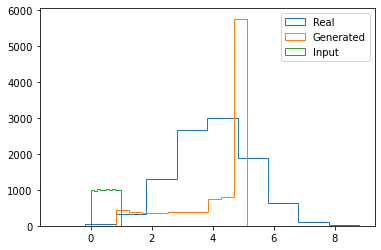

Stage 21 (Epoch: 4200)
Mean and Std of Real: (3.9934377659870863, 1.2363324738049408)
Mean and Std of Gen: (3.9577098, 1.2634336)


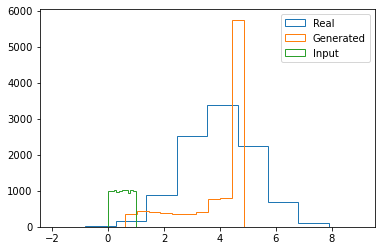

Stage 22 (Epoch: 4400)
Mean and Std of Real: (4.007426285248538, 1.2499386299715072)
Mean and Std of Gen: (3.9868312, 1.3244551)


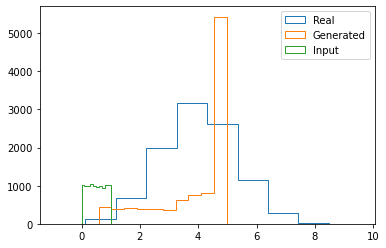

Stage 23 (Epoch: 4600)
Mean and Std of Real: (3.989111567114506, 1.2518168454826997)
Mean and Std of Gen: (4.0526314, 1.2290845)


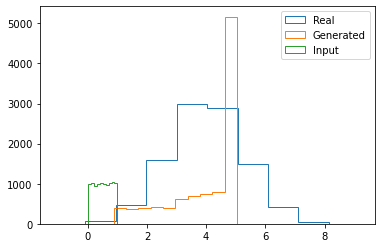

Stage 24 (Epoch: 4800)
Mean and Std of Real: (3.98084894968262, 1.2486804989777127)
Mean and Std of Gen: (3.9430032, 1.1843703)


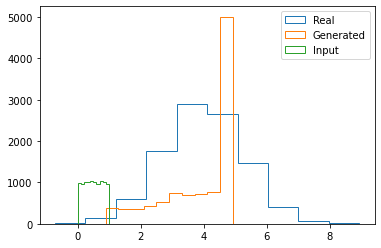

Stage 25 (Epoch: 5000)
Mean and Std of Real: (4.018162584366404, 1.2531829345513716)
Mean and Std of Gen: (3.8055031, 1.2543714)


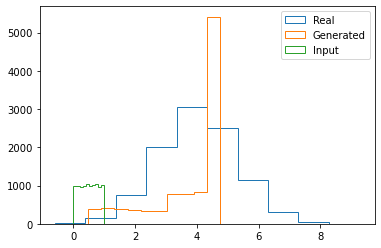

Stage 26 (Epoch: 5200)
Mean and Std of Real: (3.9942577120364047, 1.2464645728272477)
Mean and Std of Gen: (3.9151952, 1.2079197)


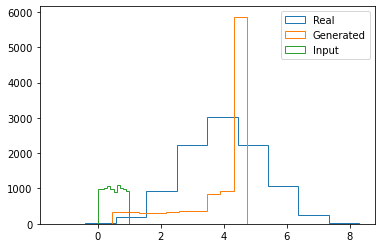

Stage 27 (Epoch: 5400)
Mean and Std of Real: (3.98495175319247, 1.2436842882977186)
Mean and Std of Gen: (4.0281463, 1.2635916)


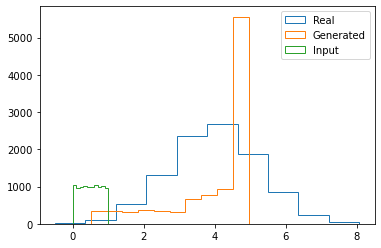

Stage 28 (Epoch: 5600)
Mean and Std of Real: (4.026541774721946, 1.262612737064868)
Mean and Std of Gen: (4.0250883, 1.2229447)


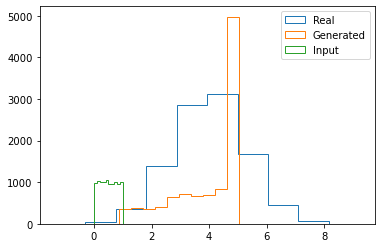

Stage 29 (Epoch: 5800)
Mean and Std of Real: (3.9952617494516316, 1.2505181899194313)
Mean and Std of Gen: (3.7762344, 1.3047178)


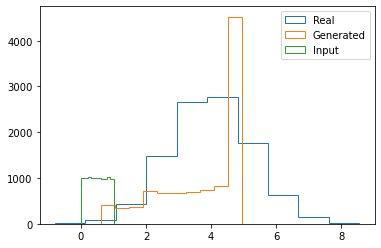

Stage 30 (Epoch: 6000)
Mean and Std of Real: (4.015046157823113, 1.23132876454388)
Mean and Std of Gen: (4.1215034, 1.1740229)


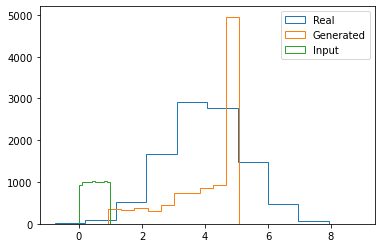

Stage 31 (Epoch: 6200)
Mean and Std of Real: (3.997270950859547, 1.2508855958278906)
Mean and Std of Gen: (4.10031, 1.3471901)


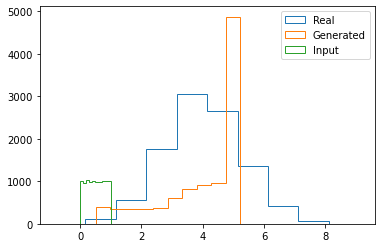

Stage 32 (Epoch: 6400)
Mean and Std of Real: (4.018384191986217, 1.2312938437466272)
Mean and Std of Gen: (4.035499, 1.2559849)


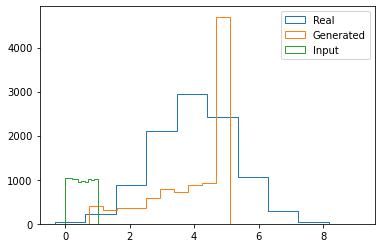

Stage 33 (Epoch: 6600)
Mean and Std of Real: (4.018336888456236, 1.2480181122013816)
Mean and Std of Gen: (3.864803, 1.1725677)


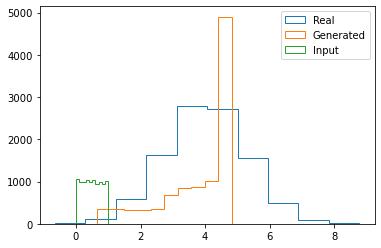

Stage 34 (Epoch: 6800)
Mean and Std of Real: (4.000076198517377, 1.25754584157548)
Mean and Std of Gen: (3.9881058, 1.3528718)


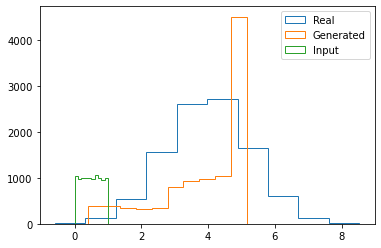

Stage 35 (Epoch: 7000)
Mean and Std of Real: (3.9882175819261714, 1.25174358217337)
Mean and Std of Gen: (3.901628, 1.3533822)


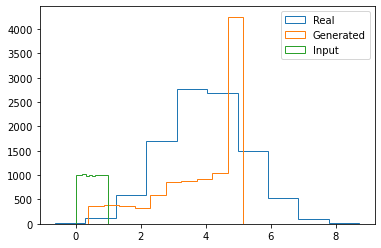

Stage 36 (Epoch: 7200)
Mean and Std of Real: (3.994425873034833, 1.2378955624205443)
Mean and Std of Gen: (4.2544746, 1.237019)


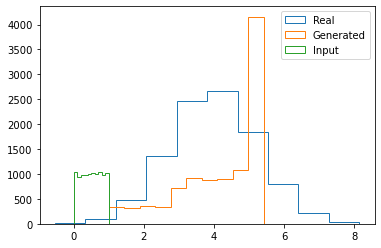

Stage 37 (Epoch: 7400)
Mean and Std of Real: (3.9998555292523714, 1.246025754883034)
Mean and Std of Gen: (4.14269, 1.2116365)


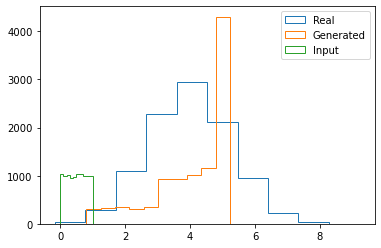

Stage 38 (Epoch: 7600)
Mean and Std of Real: (3.9965390302643935, 1.2434880839793225)
Mean and Std of Gen: (3.8809853, 1.2763498)


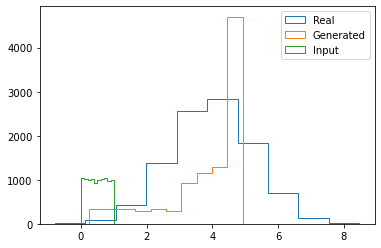

Stage 39 (Epoch: 7800)
Mean and Std of Real: (4.000872914150652, 1.2391039906129186)
Mean and Std of Gen: (3.9072516, 1.2609727)


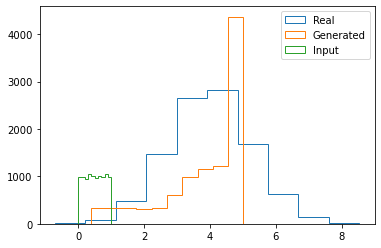

Stage 40 (Epoch: 8000)
Mean and Std of Real: (4.007123174533897, 1.2496850448356636)
Mean and Std of Gen: (3.9636388, 1.2543955)


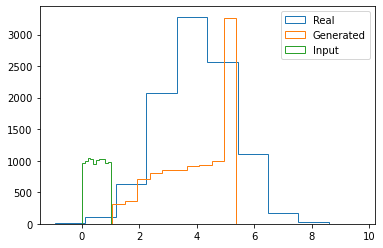

Stage 41 (Epoch: 8200)
Mean and Std of Real: (4.002592069008911, 1.2395212798427957)
Mean and Std of Gen: (3.8019726, 1.2016777)


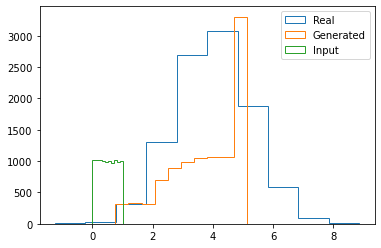

Stage 42 (Epoch: 8400)
Mean and Std of Real: (3.961967754889502, 1.2711289332948905)
Mean and Std of Gen: (4.0265374, 1.1889161)


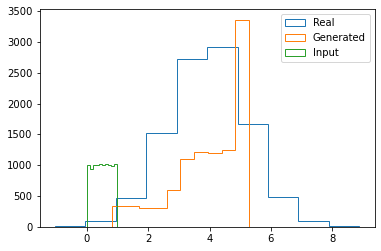

Stage 43 (Epoch: 8600)
Mean and Std of Real: (4.012392530804327, 1.2591623854297522)
Mean and Std of Gen: (3.9624004, 1.2535214)


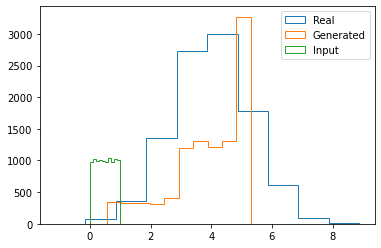

Stage 44 (Epoch: 8800)
Mean and Std of Real: (4.008069062421353, 1.2530673583816991)
Mean and Std of Gen: (4.114622, 1.2462182)


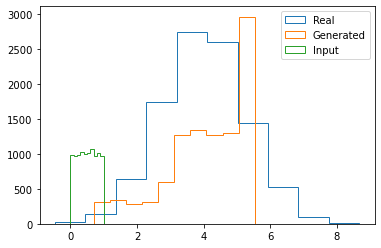

Stage 45 (Epoch: 9000)
Mean and Std of Real: (3.99654170659523, 1.2546337425171767)
Mean and Std of Gen: (3.9742112, 1.248)


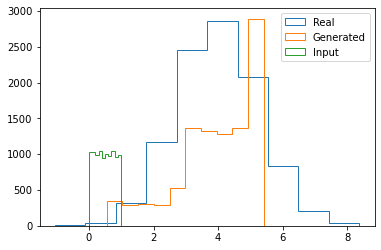

Stage 46 (Epoch: 9200)
Mean and Std of Real: (4.030882238567659, 1.2423663931694358)
Mean and Std of Gen: (3.8978925, 1.2177688)


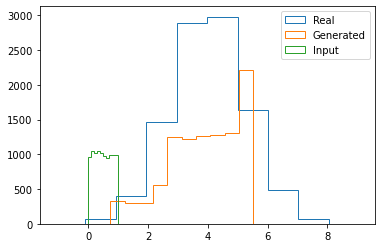

Stage 47 (Epoch: 9400)
Mean and Std of Real: (3.992224360855612, 1.2493491983592646)
Mean and Std of Gen: (3.8036625, 1.211753)


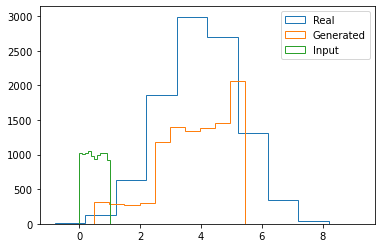

Stage 48 (Epoch: 9600)
Mean and Std of Real: (4.000545024623578, 1.2403882850443981)
Mean and Std of Gen: (3.896525, 1.2723497)


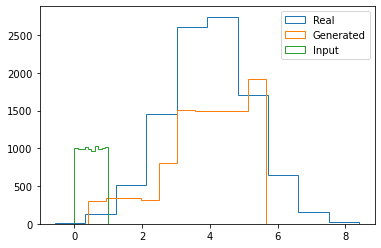

Stage 49 (Epoch: 9800)
Mean and Std of Real: (3.9835904683545063, 1.249774410071646)
Mean and Std of Gen: (3.9318676, 1.237847)


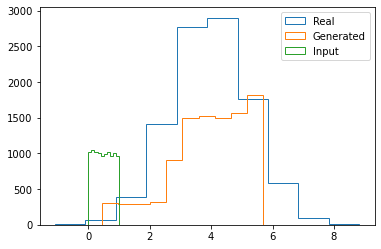

Stage 50 (Epoch: 10000)
Mean and Std of Real: (4.006313433965472, 1.2439908117207292)
Mean and Std of Gen: (3.5779195, 1.242776)


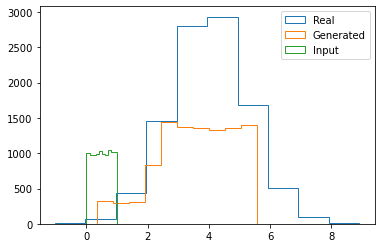

Stage 51 (Epoch: 10200)
Mean and Std of Real: (3.9912929257687284, 1.2529077793674699)
Mean and Std of Gen: (4.1977086, 1.2630888)


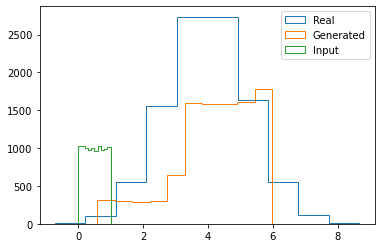

Stage 52 (Epoch: 10400)
Mean and Std of Real: (4.007436570008816, 1.2506611994020633)
Mean and Std of Gen: (4.3351374, 1.3097913)


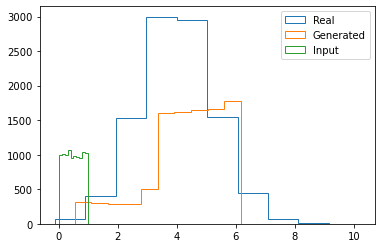

Stage 53 (Epoch: 10600)
Mean and Std of Real: (4.001355488464749, 1.2549665177135603)
Mean and Std of Gen: (4.310385, 1.205164)


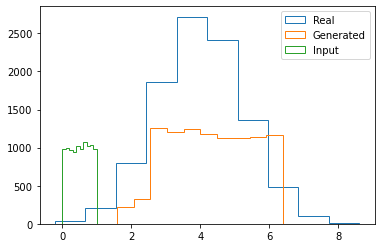

Stage 54 (Epoch: 10800)
Mean and Std of Real: (4.023460871559919, 1.2507923416657754)
Mean and Std of Gen: (3.8787122, 1.4231591)


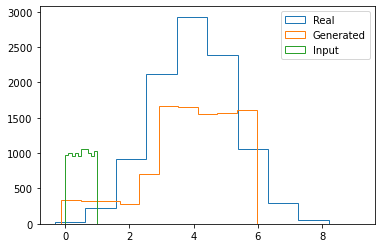

Stage 55 (Epoch: 11000)
Mean and Std of Real: (3.9934890857076817, 1.2468359230531174)
Mean and Std of Gen: (3.924533, 1.2886873)


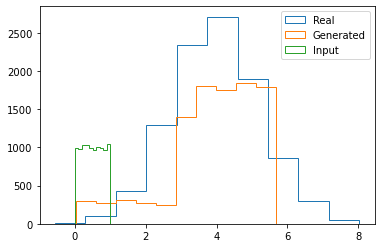

Stage 56 (Epoch: 11200)
Mean and Std of Real: (3.9953107410154023, 1.2613475459151249)
Mean and Std of Gen: (3.85923, 1.2144796)


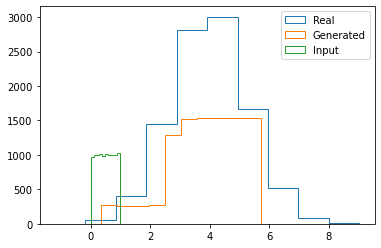

Stage 57 (Epoch: 11400)
Mean and Std of Real: (4.019882444922331, 1.2471347667061878)
Mean and Std of Gen: (4.238468, 1.2364147)


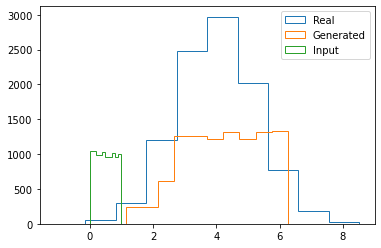

Stage 58 (Epoch: 11600)
Mean and Std of Real: (3.999068128568613, 1.271972050499493)
Mean and Std of Gen: (3.8354657, 1.2692814)


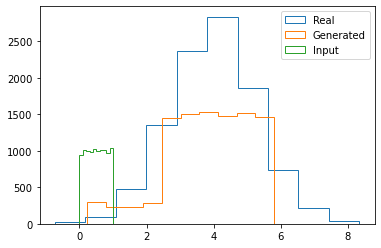

Stage 59 (Epoch: 11800)
Mean and Std of Real: (3.9853895003720203, 1.2475526121841007)
Mean and Std of Gen: (4.1676264, 1.2370865)


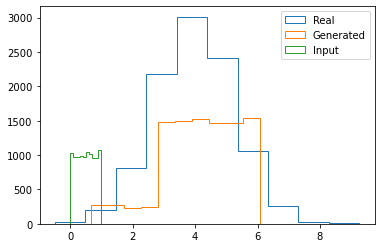

Stage 60 (Epoch: 12000)
Mean and Std of Real: (4.006323256685814, 1.24209364064851)
Mean and Std of Gen: (4.124701, 1.2682204)


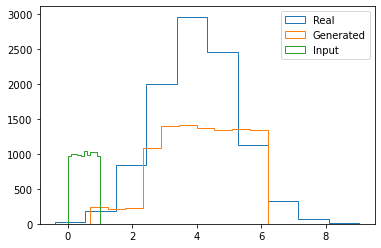

Stage 61 (Epoch: 12200)
Mean and Std of Real: (4.008360227804346, 1.2352716509650061)
Mean and Std of Gen: (4.1237698, 1.2911273)


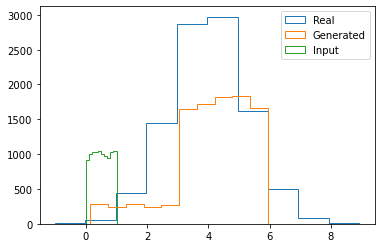

Stage 62 (Epoch: 12400)
Mean and Std of Real: (3.978389827049723, 1.2506686189532816)
Mean and Std of Gen: (4.06697, 1.2443808)


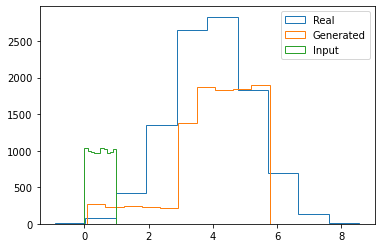

Stage 63 (Epoch: 12600)
Mean and Std of Real: (3.9812174411524683, 1.2469595172971217)
Mean and Std of Gen: (3.9166028, 1.2732402)


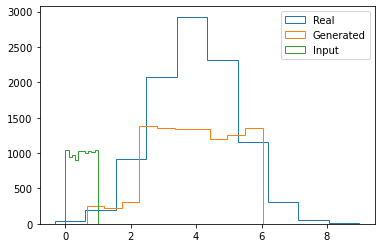

Stage 64 (Epoch: 12800)
Mean and Std of Real: (4.004706938983451, 1.2588354612439816)
Mean and Std of Gen: (3.5005007, 1.2697287)


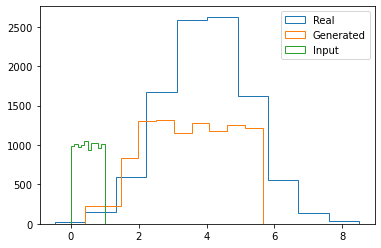

Stage 65 (Epoch: 13000)
Mean and Std of Real: (4.000721935187013, 1.2449228654030937)
Mean and Std of Gen: (4.496329, 1.2663937)


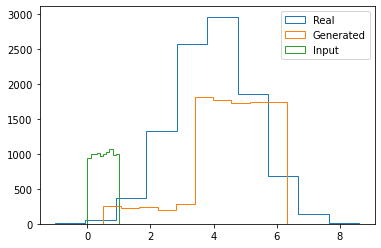

Stage 66 (Epoch: 13200)
Mean and Std of Real: (3.9907304443249685, 1.2471454499166708)
Mean and Std of Gen: (3.960591, 1.1417177)


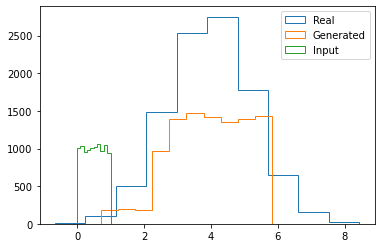

Stage 67 (Epoch: 13400)
Mean and Std of Real: (3.9958373760038763, 1.2520222534944152)
Mean and Std of Gen: (3.8692324, 1.2629281)


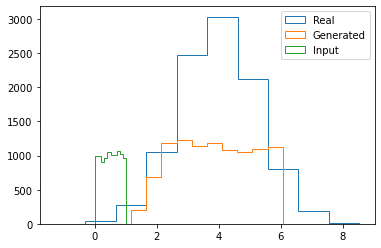

Stage 68 (Epoch: 13600)
Mean and Std of Real: (4.0137719941327665, 1.2422672955561933)
Mean and Std of Gen: (4.433567, 1.2869444)


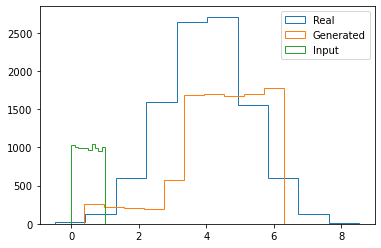

Stage 69 (Epoch: 13800)
Mean and Std of Real: (3.9794792934731733, 1.2611849654760547)
Mean and Std of Gen: (4.2217355, 1.2461601)


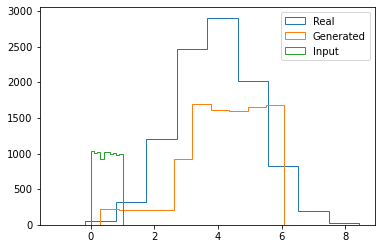

Stage 70 (Epoch: 14000)
Mean and Std of Real: (4.005261273750226, 1.2591631485789605)
Mean and Std of Gen: (4.2364182, 1.2708529)


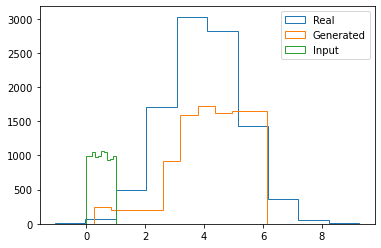

Stage 71 (Epoch: 14200)
Mean and Std of Real: (3.970243246838324, 1.263583363846808)
Mean and Std of Gen: (3.9605684, 1.218614)


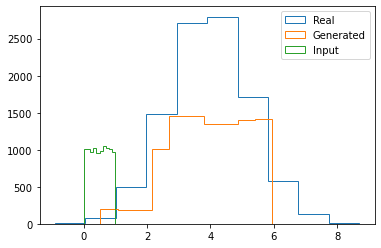

Stage 72 (Epoch: 14400)
Mean and Std of Real: (3.9955040051679616, 1.2334243422113922)
Mean and Std of Gen: (4.2881985, 1.3187065)


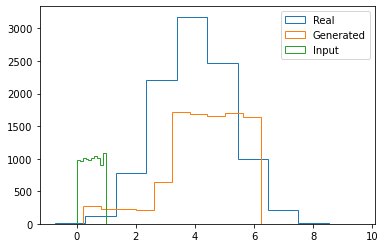

Stage 73 (Epoch: 14600)
Mean and Std of Real: (3.9921918269210086, 1.258866287167139)
Mean and Std of Gen: (4.0795126, 1.2486029)


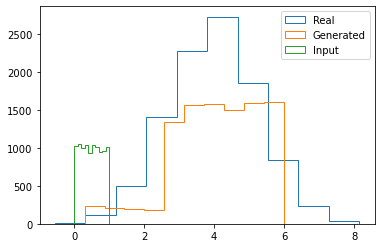

Stage 74 (Epoch: 14800)
Mean and Std of Real: (3.981166403517165, 1.2509870609689109)
Mean and Std of Gen: (4.2171984, 1.1989057)


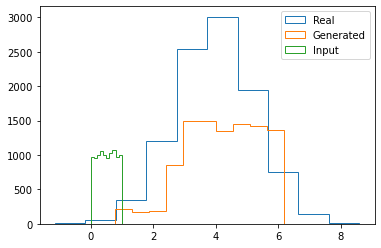

Stage 75 (Epoch: 15000)
Mean and Std of Real: (4.017605413449089, 1.2434458311649608)
Mean and Std of Gen: (4.4077573, 1.2310213)


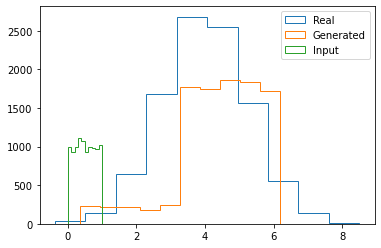

Stage 76 (Epoch: 15200)
Mean and Std of Real: (3.988574466237049, 1.2502771636255088)
Mean and Std of Gen: (3.604155, 1.2426779)


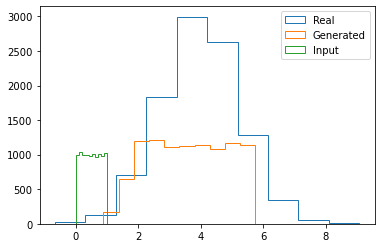

Stage 77 (Epoch: 15400)
Mean and Std of Real: (3.9919422264271036, 1.2594396075767258)
Mean and Std of Gen: (3.5009594, 1.2303823)


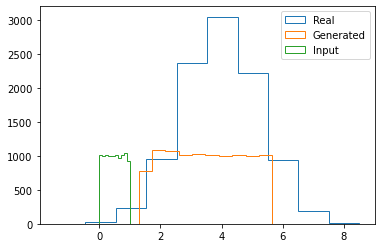

Stage 78 (Epoch: 15600)
Mean and Std of Real: (4.007793473106886, 1.2621843543268596)
Mean and Std of Gen: (3.8547359, 1.267553)


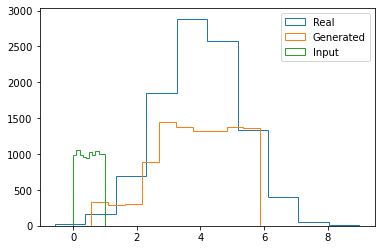

Stage 79 (Epoch: 15800)
Mean and Std of Real: (4.0088891512615445, 1.2651640560498236)
Mean and Std of Gen: (4.393997, 1.2604352)


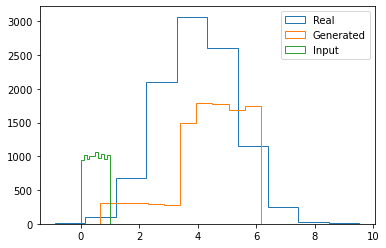

Stage 80 (Epoch: 16000)
Mean and Std of Real: (3.9761865376099754, 1.240513340827962)
Mean and Std of Gen: (4.332376, 1.2903215)


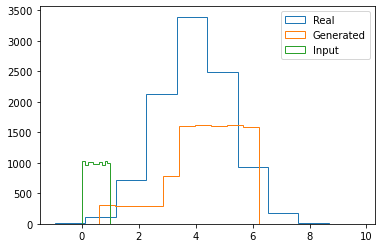

Stage 81 (Epoch: 16200)
Mean and Std of Real: (4.0067198143174405, 1.2472125265683118)
Mean and Std of Gen: (4.2997575, 1.308695)


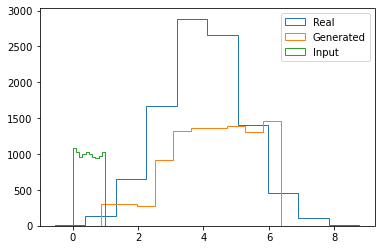

Stage 82 (Epoch: 16400)
Mean and Std of Real: (4.002163774414613, 1.2613304908983316)
Mean and Std of Gen: (3.9823852, 1.3070328)


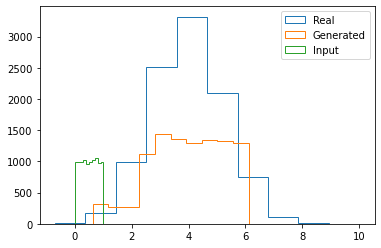

Stage 83 (Epoch: 16600)
Mean and Std of Real: (4.011377264056494, 1.248720400547359)
Mean and Std of Gen: (4.2590427, 1.3047447)


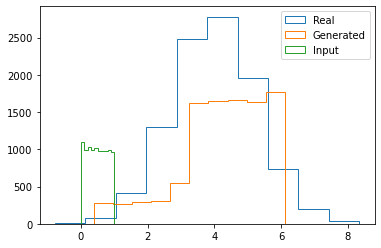

Stage 84 (Epoch: 16800)
Mean and Std of Real: (3.984703752290044, 1.238508900300053)
Mean and Std of Gen: (3.8156312, 1.2446591)


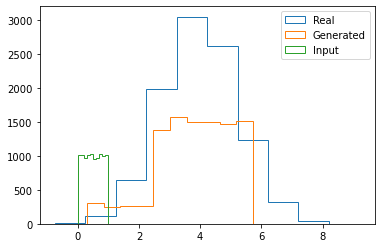

Stage 85 (Epoch: 17000)
Mean and Std of Real: (4.014599643375679, 1.2646466773614218)
Mean and Std of Gen: (3.988275, 1.2568532)


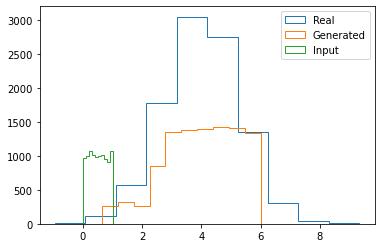

Stage 86 (Epoch: 17200)
Mean and Std of Real: (3.995883985728639, 1.2407840356828284)
Mean and Std of Gen: (4.348982, 1.2683163)


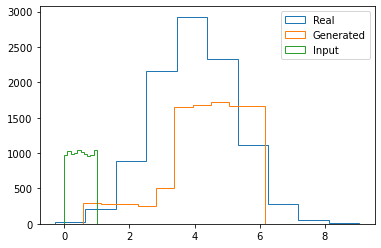

Stage 87 (Epoch: 17400)
Mean and Std of Real: (3.9985519346951586, 1.2571685007370736)
Mean and Std of Gen: (3.8976884, 1.2119151)


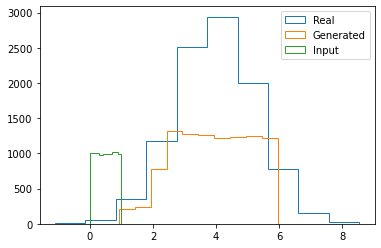

Stage 88 (Epoch: 17600)
Mean and Std of Real: (3.999576207054471, 1.2429629303267107)
Mean and Std of Gen: (4.224988, 1.2865188)


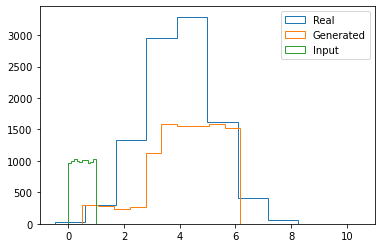

Stage 89 (Epoch: 17800)
Mean and Std of Real: (3.993327907762627, 1.2412761723823889)
Mean and Std of Gen: (4.2624164, 1.24174)


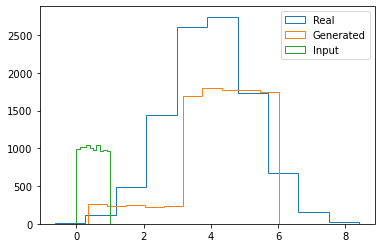

Stage 90 (Epoch: 18000)
Mean and Std of Real: (4.002251555109039, 1.2454836729335943)
Mean and Std of Gen: (4.2924075, 1.2658218)


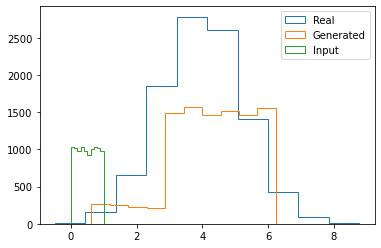

Stage 91 (Epoch: 18200)
Mean and Std of Real: (3.985967135394816, 1.2565777306503787)
Mean and Std of Gen: (4.1791334, 1.2367506)


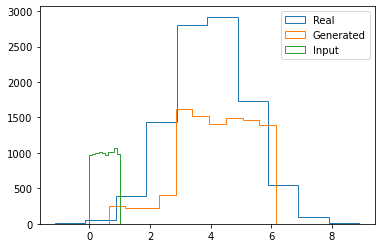

Stage 92 (Epoch: 18400)
Mean and Std of Real: (3.9871786116213945, 1.2380125882166897)
Mean and Std of Gen: (3.719775, 1.3407755)


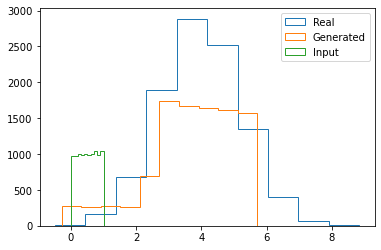

Stage 93 (Epoch: 18600)
Mean and Std of Real: (4.016015095369103, 1.2534917819245748)
Mean and Std of Gen: (3.8697698, 1.2208775)


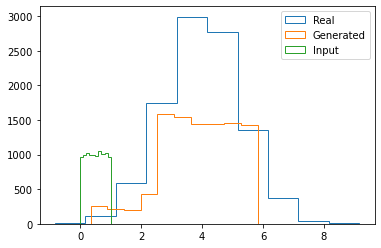

Stage 94 (Epoch: 18800)
Mean and Std of Real: (3.9859839935884716, 1.242350541988051)
Mean and Std of Gen: (4.0379343, 1.3387924)


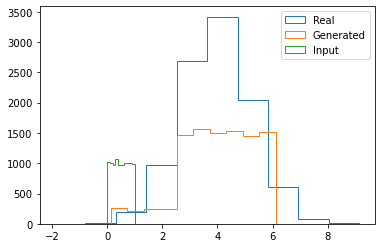

Stage 95 (Epoch: 19000)
Mean and Std of Real: (3.9971997689932257, 1.2371587409449587)
Mean and Std of Gen: (3.734143, 1.2074916)


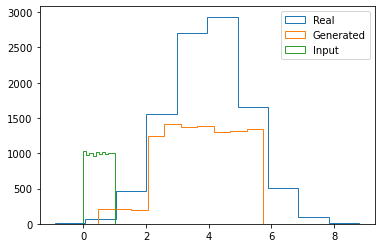

Stage 96 (Epoch: 19200)
Mean and Std of Real: (4.010353209023578, 1.2412551107064191)
Mean and Std of Gen: (3.9036953, 1.2214725)


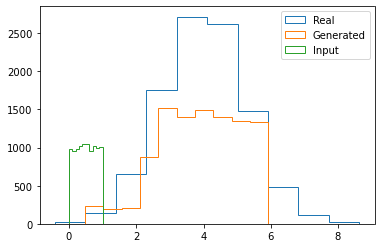

Stage 97 (Epoch: 19400)
Mean and Std of Real: (3.9971147793104107, 1.246806375271268)
Mean and Std of Gen: (4.1222444, 1.179514)


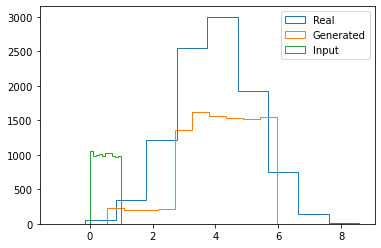

Stage 98 (Epoch: 19600)
Mean and Std of Real: (4.006880874473587, 1.2447491236789534)
Mean and Std of Gen: (4.0854445, 1.1685753)


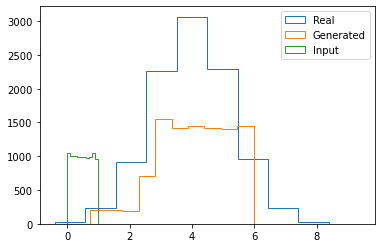

Stage 99 (Epoch: 19800)
Mean and Std of Real: (3.9805843409156543, 1.245785703422682)
Mean and Std of Gen: (3.7903562, 1.2495139)


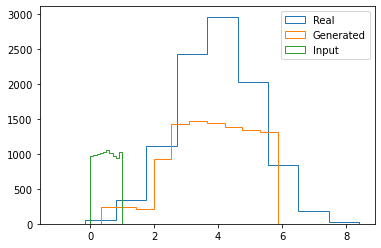

Stage 100 (Epoch: 20000)
Mean and Std of Real: (4.020133100275398, 1.2557459443591055)
Mean and Std of Gen: (4.5253763, 1.2926286)


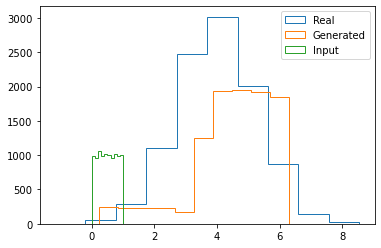

Stage 101 (Epoch: 20200)
Mean and Std of Real: (4.000354556296955, 1.2441326312101268)
Mean and Std of Gen: (3.3034902, 1.2197912)


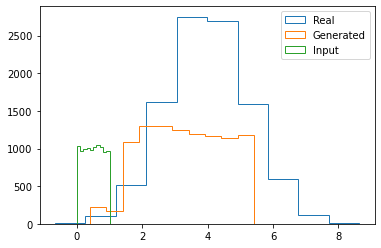

Stage 102 (Epoch: 20400)
Mean and Std of Real: (4.0030779949573345, 1.241095862830755)
Mean and Std of Gen: (3.615229, 1.2224488)


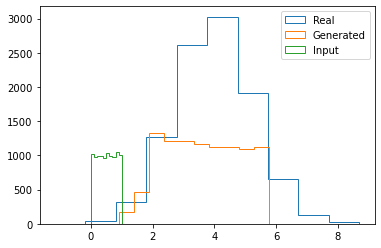

Stage 103 (Epoch: 20600)
Mean and Std of Real: (4.005646650913869, 1.244738242784276)
Mean and Std of Gen: (4.1838117, 1.2814875)


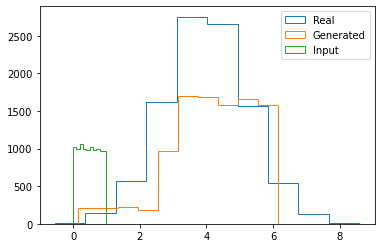

Stage 104 (Epoch: 20800)
Mean and Std of Real: (4.001818568926361, 1.2725208769105176)
Mean and Std of Gen: (3.7299087, 1.2425934)


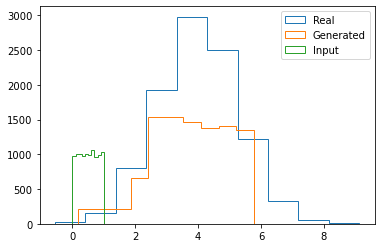

Stage 105 (Epoch: 21000)
Mean and Std of Real: (3.99679779373508, 1.260314081146558)
Mean and Std of Gen: (4.3589754, 1.3278018)


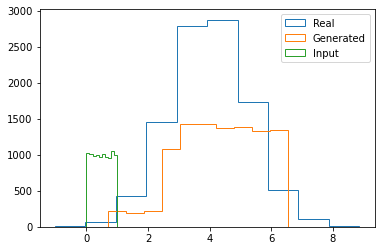

Stage 106 (Epoch: 21200)
Mean and Std of Real: (4.008216514567548, 1.2438537954873385)
Mean and Std of Gen: (4.443214, 1.3715862)


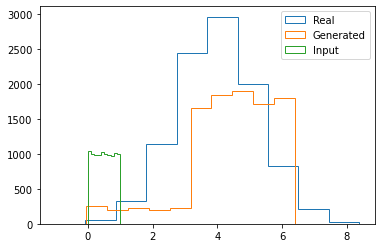

Stage 107 (Epoch: 21400)
Mean and Std of Real: (4.000821021439117, 1.2478301365752817)
Mean and Std of Gen: (3.9761837, 1.2117534)


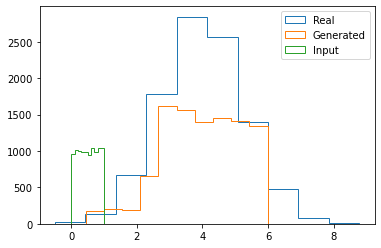

Stage 108 (Epoch: 21600)
Mean and Std of Real: (4.025567615723574, 1.2497707645486158)
Mean and Std of Gen: (3.675891, 1.2517972)


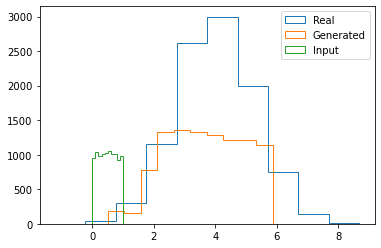

Stage 109 (Epoch: 21800)
Mean and Std of Real: (4.0064754085515455, 1.269876917844617)
Mean and Std of Gen: (4.384154, 1.1965754)


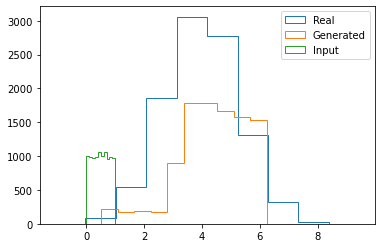

Stage 110 (Epoch: 22000)
Mean and Std of Real: (3.994467427271194, 1.2365038517586697)
Mean and Std of Gen: (4.1740465, 1.2015857)


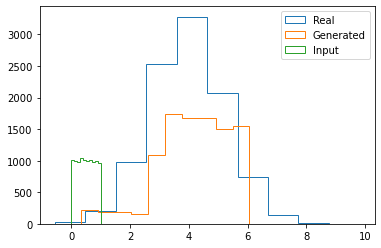

Stage 111 (Epoch: 22200)
Mean and Std of Real: (4.0102743854789145, 1.247175154292275)
Mean and Std of Gen: (3.6511712, 1.2190484)


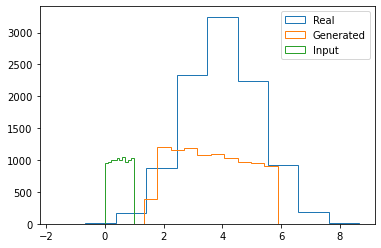

Stage 112 (Epoch: 22400)
Mean and Std of Real: (3.9982454896874957, 1.265194988609039)
Mean and Std of Gen: (3.864765, 1.3051168)


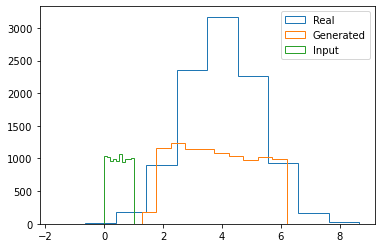

Stage 113 (Epoch: 22600)
Mean and Std of Real: (3.993547071876811, 1.250120719059769)
Mean and Std of Gen: (3.636261, 1.1527497)


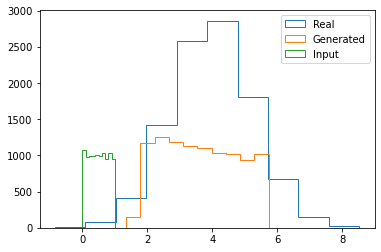

Stage 114 (Epoch: 22800)
Mean and Std of Real: (4.0132049926911595, 1.2565054283165404)
Mean and Std of Gen: (4.464975, 1.2336577)


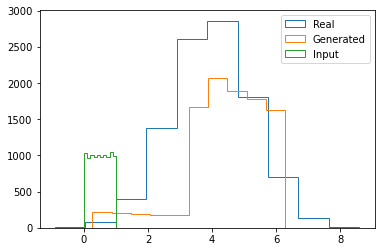

Stage 115 (Epoch: 23000)
Mean and Std of Real: (4.009859946849264, 1.2520119413631259)
Mean and Std of Gen: (3.8645723, 1.2996588)


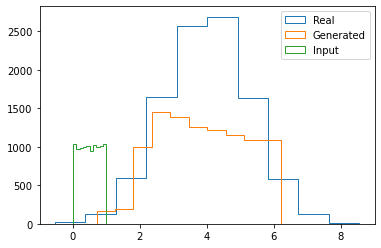

Stage 116 (Epoch: 23200)
Mean and Std of Real: (3.977505007754296, 1.2627853955734583)
Mean and Std of Gen: (4.1126213, 1.2262986)


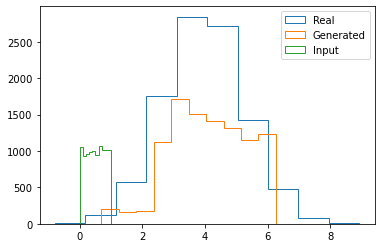

Stage 117 (Epoch: 23400)
Mean and Std of Real: (4.009281740309676, 1.240663335973987)
Mean and Std of Gen: (4.2676616, 1.2619573)


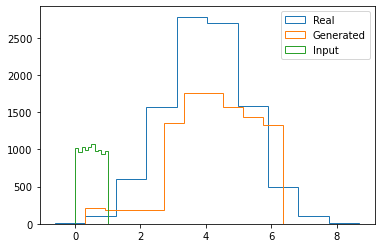

Stage 118 (Epoch: 23600)
Mean and Std of Real: (3.993076060905394, 1.2425292990084154)
Mean and Std of Gen: (4.0357623, 1.3264657)


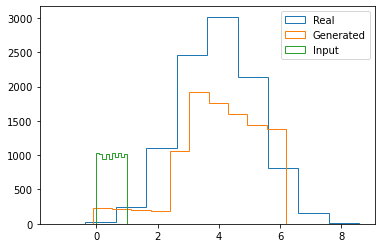

Stage 119 (Epoch: 23800)
Mean and Std of Real: (4.008817465360464, 1.2589321480897961)
Mean and Std of Gen: (3.763929, 1.2538161)


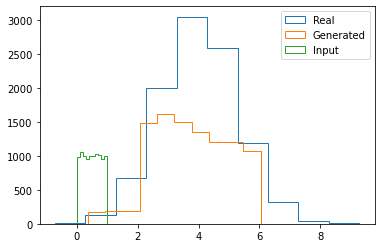

Stage 120 (Epoch: 24000)
Mean and Std of Real: (3.993829477216799, 1.258518011441219)
Mean and Std of Gen: (3.9744692, 1.3335423)


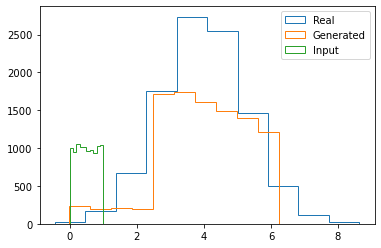

Stage 121 (Epoch: 24200)
Mean and Std of Real: (3.996471482762832, 1.2586076513521502)
Mean and Std of Gen: (3.724367, 1.2964596)


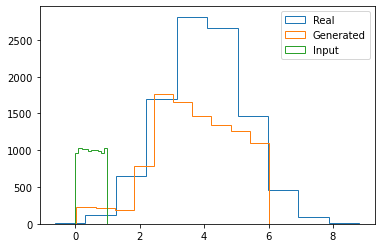

Stage 122 (Epoch: 24400)


In [ ]:
# set to use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


# 7.2.1 패키지 임포트
from keras import backend as K
from keras.optimizers import Adam
from keras.layers import Dense, Conv1D, Reshape, Flatten, Lambda
from keras import models
import matplotlib.pyplot as plt
import numpy as np


# 7.2.2 데이터 관리 클래스
class Data:
    def __init__(self, mu, sigma, ni_D):
        self.real_sample = lambda n_batch: np.random.normal(mu, sigma,
                                                            (n_batch, ni_D))
        self.in_sample = lambda n_batch: np.random.rand(n_batch, ni_D)


# 7.2.3 머신 구현하기
class Machine:
    def __init__(self, n_batch=10, ni_D=100):
        data_mean = 4
        data_stddev = 1.25

        self.n_iter_D = 1
        self.n_iter_G = 5

        self.data = Data(data_mean, data_stddev, ni_D)
        self.gan = GAN(ni_D=ni_D, nh_D=50, nh_G=50)

        self.n_batch = n_batch
        # self.ni_D = ni_D

    def train_D(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data

        # Real data
        Real = data.real_sample(n_batch)  # (n_batch, ni_D)
        # Generated data
        Z = data.in_sample(n_batch)  # (n_batch, ni_D)
        Gen = gan.G.predict(Z)  # (n_batch, ni_D)

        gan.D.trainable = True
        gan.D_train_on_batch(Real, Gen)

    def train_GD(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data
        # Seed data for data generation
        Z = data.in_sample(n_batch)

        gan.D.trainable = False
        gan.GD_train_on_batch(Z)

    def train_each(self):
        for it in range(self.n_iter_D):
            self.train_D()
        for it in range(self.n_iter_G):
            self.train_GD()

    def train(self, epochs):
        for epoch in range(epochs):
            self.train_each()

    def test(self, n_test):
        gan = self.gan
        data = self.data
        Z = data.in_sample(n_test)
        Gen = gan.G.predict(Z)
        return Gen, Z

    def show_hist(self, Real, Gen, Z):
        plt.hist(Real.reshape(-1), histtype='step', label='Real')
        plt.hist(Gen.reshape(-1), histtype='step', label='Generated')
        plt.hist(Z.reshape(-1), histtype='step', label='Input')
        plt.legend(loc=0)

    def test_and_show(self, n_test):
        data = self.data
        Gen, Z = self.test(n_test)
        Real = data.real_sample(n_test)
        self.show_hist(Real, Gen, Z)
        Machine.print_stat(Real, Gen)

    def run_epochs(self, epochs, n_test):
        self.train(epochs)
        self.test_and_show(n_test)

    def run(self, n_repeat=200, n_show=200, n_test=100):
        for ii in range(n_repeat):
            print('Stage', ii, '(Epoch: {})'.format(ii * n_show))
            self.run_epochs(n_show, n_test)
            plt.show()

    @staticmethod
    def print_stat(Real, Gen):
        def stat(d):
            return (np.mean(d), np.std(d))
        print('Mean and Std of Real:', stat(Real))
        print('Mean and Std of Gen:', stat(Gen))


# 7.2.4 GAN 모델링
def add_decorate(x):
    m = K.mean(x, axis=-1, keepdims=True)
    d = K.square(x - m)
    return K.concatenate([x, d], axis=-1)


def add_decorate_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 2
    shape[1] *= 2
    return tuple(shape)


lr = 2e-4  # 0.0002
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999)


def model_compile(model):
    return model.compile(loss='binary_crossentropy', optimizer=adam,
                         metrics=['accuracy'])


class GAN:
    def __init__(self, ni_D, nh_D, nh_G):
        self.ni_D = ni_D
        self.nh_D = nh_D
        self.nh_G = nh_G

        self.D = self.gen_D()
        self.G = self.gen_G()
        self.GD = self.make_GD()

    def gen_D(self):
        ni_D = self.ni_D
        nh_D = self.nh_D
        D = models.Sequential()
        D.add(Lambda(add_decorate, output_shape=add_decorate_shape,
                     input_shape=(ni_D,)))
        D.add(Dense(nh_D, activation='relu'))
        D.add(Dense(nh_D, activation='relu'))
        D.add(Dense(1, activation='sigmoid'))

        model_compile(D)
        return D

    def gen_G(self):
        ni_D = self.ni_D
        nh_G = self.nh_D

        G = models.Sequential()
        G.add(Reshape((ni_D, 1), input_shape=(ni_D,)))
        G.add(Conv1D(nh_G, 1, activation='relu'))
        G.add(Conv1D(nh_G, 1, activation='sigmoid'))
        G.add(Conv1D(1, 1))
        G.add(Flatten())

        model_compile(G)
        return G

    def make_GD(self):
        G, D = self.G, self.D
        GD = models.Sequential()
        GD.add(G)
        GD.add(D)
        D.trainable = False
        model_compile(GD)
        D.trainable = True
        return GD

    def D_train_on_batch(self, Real, Gen):
        D = self.D
        X = np.concatenate([Real, Gen], axis=0)
        y = np.array([1] * Real.shape[0] + [0] * Gen.shape[0])
        D.train_on_batch(X, y)

    def GD_train_on_batch(self, Z):
        GD = self.GD
        y = np.array([1] * Z.shape[0])
        GD.train_on_batch(Z, y)


# 7.2.5 코드 수행과 결과 보기
def main():
    machine = Machine(n_batch=1, ni_D=100)
    machine.run(n_repeat=200, n_show=200, n_test=100)


main()